## Cálcular de estimadores estadísticos con Python

Supongamos que hacemos una toma de datos y el promedio es igual a 20.0, con una desviación típica de 2.0. Además, los datos están normalmente distribuido. Con las siguientes instrucciones se obtiene una muestra de la población con dichas características

In [2]:
import numpy as np  # importa numpy
import matplotlib.pyplot as plt  #importa las herramientas para graficar
import pandas as pd

In [3]:
prom = 20.0  #mu
DT = 2.0  #sigma
np.random.normal(prom, DT)

21.234713353493596

Ahora simularemos un experimento donde se toman diez muestras de la población antes mencionada

In [4]:
N = 10
muestras = np.random.normal(prom, DT, N)
print(muestras)

[20.89905212 20.29989452 18.6597793  18.87678    18.54337596 22.04490209
 20.16337619 20.82564495 20.0522479  19.62432533]


# Ejercicio

Ahora calcularemos el promedio y la desvición típica de las muestras obtenidas

In [5]:
np.mean(muestras)

19.998937836099554

In [6]:
np.std(muestras)

1.054118383326861

Implementaremos la distribución estándar en el paquete <code>scipy.stats</code> mediante el comando <code>scipy.stats.norm</code>. La documentación de este comando [documentation](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.norm.html) menciona que puede ser usado con una o tres variables.

La versión de una variable está definida por la siguiente ecuación:

$$f(x)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right),$$

lo cual equivale a que $\mu=0$ y $\sigma=1$ en la definición dada anteriormente. las versión de tres variables reemplaza $f(x)$ con $f((x-l)/s)/s$ lo cual resulta en:

$$f(x)=\frac{1}{\sqrt{2\pi s^2}}\exp\left(-\frac{(x-l)^2}{2s^2}\right),$$

donde $l$ y $s$ son los parametros llamados ubicación y escala, respectivamente ($l$ y $s$ se llaman <code>loc</code> y <code>scale</code>, respectivamente en la documentación). Esta ecuación equivale a la definición dada anteriormente, pero con $\mu=l$ y $\sigma=s$. Así que, los parámetros de ubicación y escala se pueden interpretar como la media y la desviación típica respectivamente.

In [7]:
# Para el caso de omitir el uso de SCIPY, tendriamos que hacer el cálculo mediante la programación de la fórmula, quedando algo similar a esto: 

def NormalPDF(x, m, s):  #NormalPDF es función de x y toma los parámetros m y s
    return np.exp(-(x - m) ** 2 / (2 * s ** 2)) / (
            2 * np.pi * s ** 2) ** 0.5  #Definición de la función normal de probabilidad

A continuación se grafica la distribución con los parámetros $\mu=20$ y $\sigma=2$ usando <code>scipy.stats</code>:

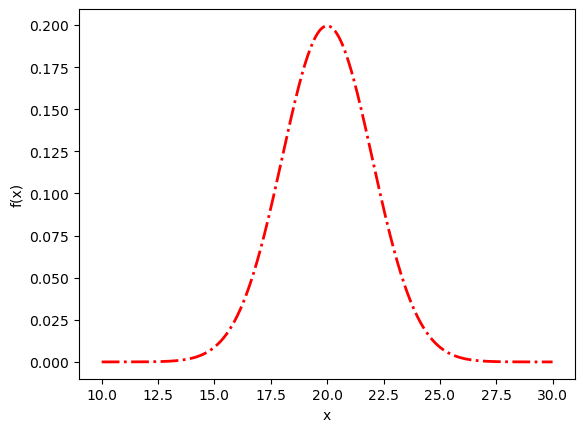

In [8]:
from scipy import stats  #Importa scipy

x = np.linspace(10, 30, 500)  #Definición de los valores de x
sy = stats.norm.pdf(x, 20, 2)  #calcula los valores de "y"

plt.plot(x, sy, color='r', linewidth=2, linestyle='-.')  #Grafica la función de probabilidad
plt.xlabel('x')  #Etiqueta del eje horizontal
plt.ylabel('f(x)');  #Etiqueta del eje vertical

# Ejercicio
Utilice los comandos de numpy para calcular la media y la desviación estándar con N = 10, N = 100 y N = 1000,
Realice las gráficas para cada N diferente.

In [24]:
# Con N = 10

N = 10
muestras = np.random.normal(20, 2, N)
print("Muestras:")
print(muestras)
prom = np.mean(muestras)  #mu
DT = np.std(muestras)  #sigma
print(f"Promedio de las muestras: {prom:,.2f}")
print(f"Desviación estándar de las muestras: {DT:,.2f}")

Muestras:
[20.42965659 21.7863118  19.12749017 19.9585321  17.92304785 21.21666945
 21.77309633 18.62902267 19.52211553 20.63984426]
Promedio de las muestras: 20.10
Desviación estándar de las muestras: 1.24


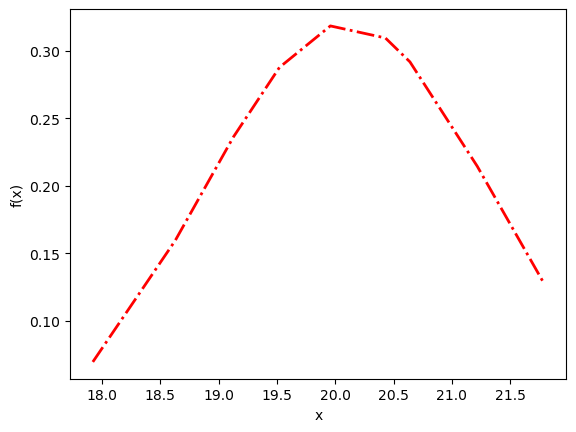

In [25]:
from scipy import stats  #Importa scipy

muestras.sort()
sy = stats.norm.pdf(muestras, prom, DT)  #calcula los valores de "y"

plt.plot(muestras, sy, color='r', linewidth=2, linestyle='-.')  #Grafica la función de probabilidad
plt.xlabel('x')  #Etiqueta del eje horizontal
plt.ylabel('f(x)');  #Etiqueta del eje vertical

In [27]:
# Con N = 100

N = 100
muestras = np.random.normal(20, 2, N)
print("Muestras:")
print(muestras)
prom = np.mean(muestras)  #mu
DT = np.std(muestras)  #sigma
print(f"Promedio de las muestras: {prom:,.2f}")
print(f"Desviación estándar de las muestras: {DT:,.2f}")

Muestras:
[18.43337597 17.64461038 18.46213446 22.576119   16.74910007 18.14920221
 18.38269369 20.61918201 17.6127806  21.37868835 20.97159977 19.79421311
 20.04525152 19.00023749 21.54546995 20.67635924 19.79847174 22.72500178
 18.91175763 20.00799943 20.2711356  20.16874339 16.16200996 22.673481
 19.4526694  21.17463282 20.82988423 16.63033875 20.34118656 18.87094732
 21.6322973  18.20518488 19.80734061 20.73218031 19.7437351  18.85138186
 20.26300959 15.59511643 19.81947774 18.73340294 18.92004115 19.40855017
 15.2825692  19.21940419 17.67315571 18.65906715 21.62722543 19.45829614
 18.04781615 19.43570386 19.3040228  19.72430155 19.37782408 13.04954838
 18.02128447 22.24270767 18.48519292 19.76550918 21.49735748 17.77387433
 15.0473782  24.8072022  17.60958344 20.73306296 20.50135447 22.07747985
 20.82470371 15.33512365 19.85665162 16.24788775 21.05505002 16.37550422
 20.09571324 22.33536772 18.07127526 17.26621542 17.83187582 16.56949099
 18.21359692 22.42126756 24.30766837 17.336

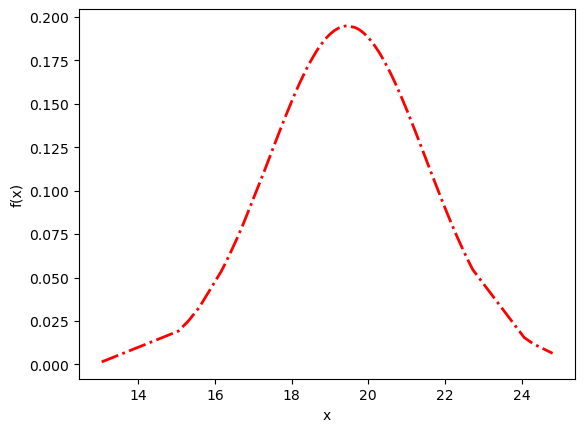

In [28]:
from scipy import stats  #Importa scipy

muestras.sort()
sy = stats.norm.pdf(muestras, prom, DT)  #calcula los valores de "y"

plt.plot(muestras, sy, color='r', linewidth=2, linestyle='-.')  #Grafica la función de probabilidad
plt.xlabel('x')  #Etiqueta del eje horizontal
plt.ylabel('f(x)');  #Etiqueta del eje vertical

In [29]:
# Con N = 1000

N = 1000
muestras = np.random.normal(20, 2, N)
print("Muestras:")
print(muestras)
prom = np.mean(muestras)  #mu
DT = np.std(muestras)  #sigma
print(f"Promedio de las muestras: {prom:,.2f}")
print(f"Desviación estándar de las muestras: {DT:,.2f}")

Muestras:
[19.55379643 22.88360082 17.60234272 19.17691598 16.87516629 17.11773157
 22.48538715 20.03131584 20.79485013 21.35636376 16.78594523 19.71357486
 19.08525897 16.45166111 18.67414648 20.11744399 18.96025014 22.38543199
 19.19830172 19.21285341 20.18720718 20.68313989 22.39215113 18.52579219
 20.68509518 21.5135884  15.38240515 20.04046476 19.05454226 18.40160977
 23.47018699 19.95049963 19.67402085 20.25567809 17.17246202 17.93975121
 24.44054786 19.81177289 19.80604876 23.82000134 20.00238328 20.99605005
 20.32884087 19.59917169 19.16513489 19.17070438 22.2983196  16.45779538
 16.97278833 20.17171535 21.28844619 19.71382223 17.20259667 22.30246999
 24.21020788 19.53222902 21.33717179 22.3026666  22.56569504 18.12204172
 22.11465896 17.90371373 19.3469814  22.59242768 21.1007415  22.34990809
 20.14085959 19.90122579 19.10980837 22.21293421 21.08390931 21.39644254
 16.61120479 23.23638655 19.94115591 21.54526369 17.58780977 18.62573726
 20.47118555 21.43677079 22.42443006 18.7

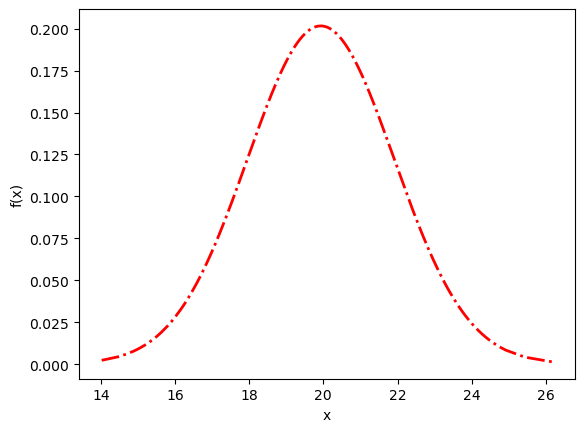

In [30]:
from scipy import stats  #Importa scipy

muestras.sort()
sy = stats.norm.pdf(muestras, prom, DT)  #calcula los valores de "y"

plt.plot(muestras, sy, color='r', linewidth=2, linestyle='-.')  #Grafica la función de probabilidad
plt.xlabel('x')  #Etiqueta del eje horizontal
plt.ylabel('f(x)');  #Etiqueta del eje vertical

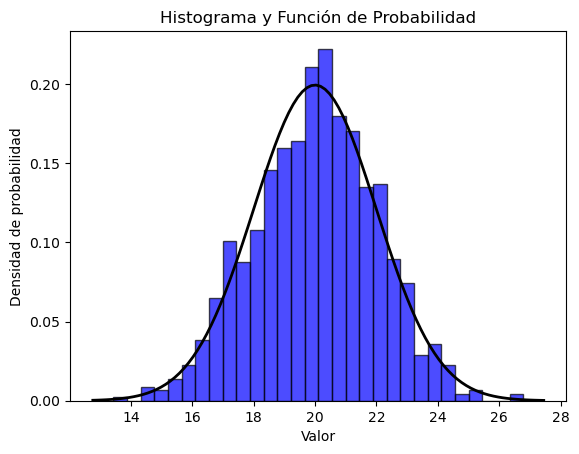

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Generar las muestras
N = 1000
muestras = np.random.normal(20, 2, N)

# Crear el histograma de las muestras
plt.hist(muestras, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# Añadir una línea que represente la función de densidad de probabilidad
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, 20, 2)
plt.plot(x, p, 'k', linewidth=2)

# Etiquetas y título del gráfico
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma y Función de Probabilidad')

# Mostrar el gráfico
plt.show()